# Regresión Logística con Python

📌 El dataset utilizado en este notebook lo obtenemos desde la librería de `sci-kit learn`; `digits` consiste en imagenes de dígistos del 0 al 9 escritos a en una escala de grises utilizando un formato de 8x8 pixeles.



🎯 El objetivo de este dataset es entrenar un modelo para clasificar imagenes de digitos del 0 al 9 escritos a mano.

### Librerias

In [1]:
# Manipulación de datoa
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Entrenamiento del modelo
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Dividir datos en entrenamiento y pruebas
from sklearn.metrics import confusion_matrix # Evaluar mododelo
# Carga del dataset
from sklearn.datasets import load_digits

### Carga de datos

In [2]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

La propiedad `data` almacena en cada imagen en un array de 64x1 (versión plana de la imagen), mediante ésta pripiedad se entrena al modelo, pues ya esta procesada para que el modelo la entienda.

Por otro parte, la propiedad `images` almacena cada imagen en una matriz de 8x8, ésta propiedad es útil para visualizar las imagenes utilizando matplotlib y sin necesidad de procesamiento previo.

In [3]:
display(digits.images[1], digits.data[1])

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

Valor que se representa en la imagen: 2


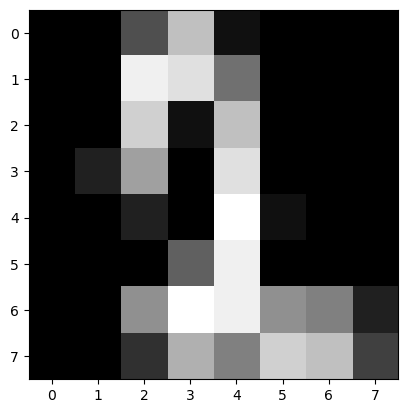

In [4]:
# Generamos matriz de 8x8 para visualizar la imagen que representa
img_idx = 12
image = np.reshape(digits.data[img_idx], (8,8))
print("Valor que se representa en la imagen:", digits.target[img_idx])
plt.imshow(image, cmap="gray");

Valor que se representa en la imagen: 2


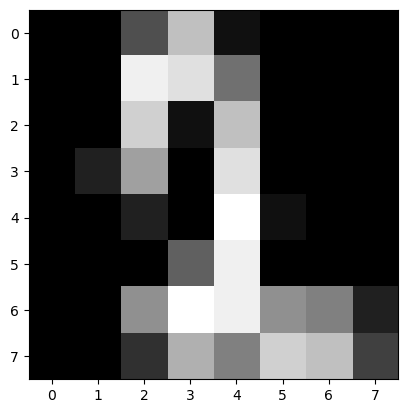

In [5]:
# A partir de la propiedad images
print("Valor que se representa en la imagen:", digits.target[img_idx])
plt.imshow(digits.images[img_idx], cmap="gray");

## Split de datos en train y test

Antes de entrenar al modelo de regresión logística separamos los datos en entrenamiento (train) y pruebas (test), con las siguientes proporciones:
- `20%`: Pruebas
- `80%`: Entrenamiento

In [6]:
seed = 42 # Semilla para obtener el mismo resultado cada que ejecutemos ésta celda
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=seed)

In [7]:
print(f"x_train: {x_train.shape}\ny_train: {y_train.shape}")
print("="*20)
print(f"x_test: {x_test.shape}\ny_test: {y_test.shape}")

x_train: (1437, 64)
y_train: (1437,)
x_test: (360, 64)
y_test: (360,)


### Entrenmaiento del modelo

In [8]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

/home/pahoalapizco/anaconda3/envs/regresion_python/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

### Evaluación del modelo

Un método para evaluar el modelo es utilizando una matriz de confusión, obtendemos:
- Eje `x` con los valors predichos
- Eje `y` con los valores reales

En la diagonal nos devolvera la cantidad de evaluaciones correctas. Y en la intersección con los otros valores nos dirá cuantas veces cometio un error al predecir el valor incorrecto.

In [9]:
predictions = logistic_reg.predict(x_test)
predictions

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 5, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 6, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 2, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [10]:
cm = confusion_matrix(y_test, predictions)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 44,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 44,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]])

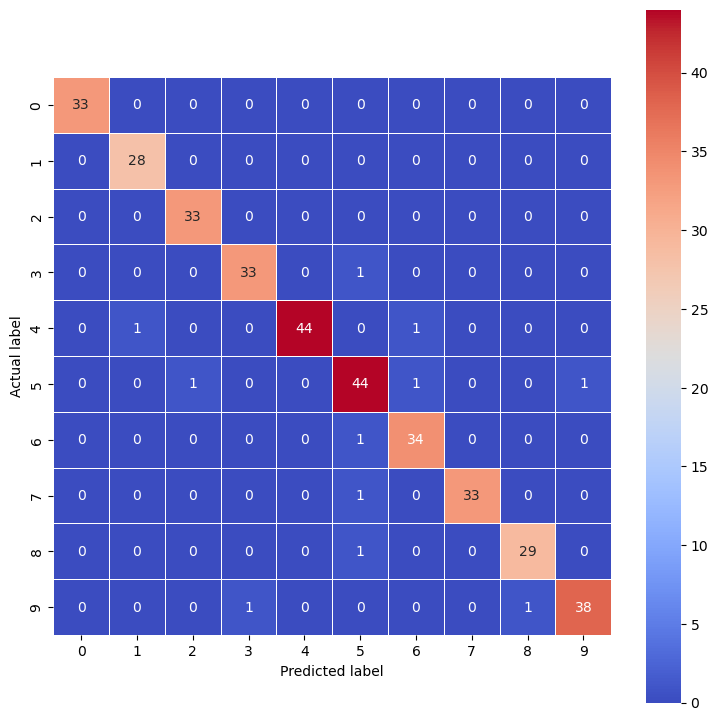

In [11]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap="coolwarm")
plt.ylabel("Actual label")
plt.xlabel("Predicted label");